In [15]:
# import
import pandas as pd 
import numpy as np
import seaborn as sns
from scipy.stats import norm
from matplotlib import pyplot as plt

In [16]:
# load the combined dataframe 
divorce_comp_db = pd.read_csv('../data/divorce_comp_db.csv', index_col=[0])
divorce_comp_db

,Zod_sign_man,Zod_sign_woman,zod_combo,Compatibility_rate
0,Sagittarius,Leo,SagittariusLeo,0.93
2,Pisces,Aries,PiscesAries,0.67
4,Scorpio,Libra,ScorpioLibra,0.35
5,Aries,Gemini,AriesGemini,0.83
6,Sagittarius,Aries,SagittariusAries,0.93
...,...,...,...,...
4918,Scorpio,Sagittarius,ScorpioSagittarius,0.28
4919,Libra,Virgo,LibraVirgo,0.68
4920,Scorpio,Aquarius,ScorpioAquarius,0.73
4921,Cancer,Aquarius,CancerAquarius,0.27


In [27]:
# Creating a matrix for the zodiac signs combinations 
adjacency_matrix = pd.crosstab(divorce_comp_db.Zod_sign_man, divorce_comp_db.Zod_sign_woman)
idx = adjacency_matrix.columns.union(adjacency_matrix.index)
adjacency_matrix = adjacency_matrix.reindex(index = idx, columns=idx, fill_value=0)
adjacency_matrix.head(12)


,Aquarius,Aries,Cancer,Capricorn,Gemini,Leo,Libra,Pisces,Sagittarius,Scorpio,Taurus,Virgo
Aquarius,35,34,28,26,32,32,23,24,26,34,32,29
Aries,35,23,25,27,29,35,32,24,28,24,30,27
Cancer,40,33,35,21,21,31,36,43,32,35,24,36
Capricorn,26,33,29,28,31,31,13,39,33,27,25,25
Gemini,29,29,22,28,30,40,36,25,22,32,30,34
Leo,24,25,28,20,35,28,31,28,29,27,40,34
Libra,29,29,29,21,29,25,35,32,26,30,37,35
Pisces,25,40,28,33,25,25,35,33,33,32,33,27
Sagittarius,35,37,33,26,26,25,35,24,36,27,32,34
Scorpio,33,35,23,31,24,27,38,33,28,33,36,32


/Users/xuandi/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, '')

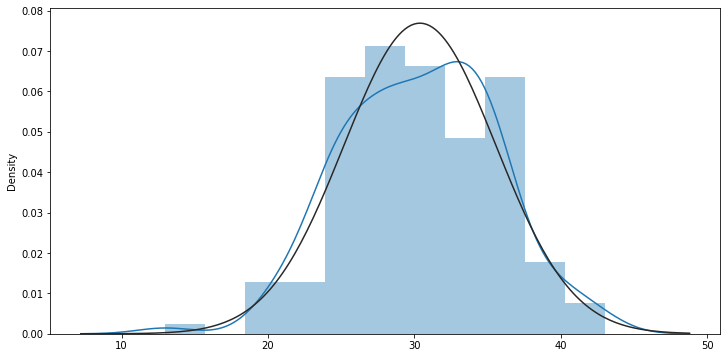

In [18]:
#see the histogram for the normal distribution for zodiac combinations 
plt.figure(figsize=(12,6))
sns.distplot(divorce_comp_db['zod_combo'].value_counts(), fit=norm);
plt.xlabel("")

/Users/xuandi/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, '')

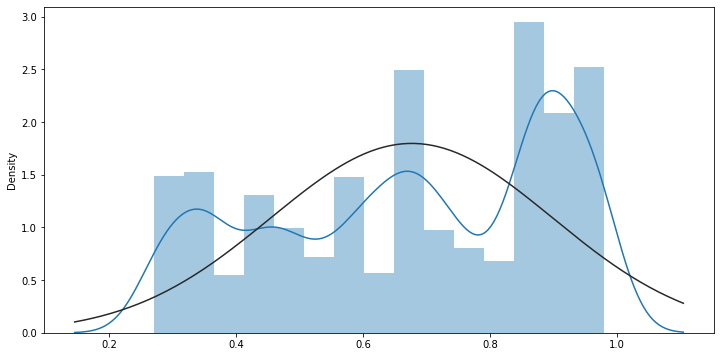

In [19]:
#see the histogram for the normal distribution for campatibility 
plt.figure(figsize=(12,6))
sns.distplot(divorce_comp_db['Compatibility_rate'], fit=norm);
plt.xlabel("")

In [20]:
# get the statistical value of the compatability rate.
divorce_comp_db['Compatibility_rate'].describe()

count    4374.000000
mean        0.676504
std         0.222105
min         0.270000
25%         0.480000
50%         0.690000
75%         0.880000
max         0.980000
Name: Compatibility_rate, dtype: float64

The zodiac compatibility matrix simply shows how good the zodiac signs fit each other in the range of 1 to 100% from the astrology point of view. Now we need to determine the "bad" and "good" fits, but where is the borderline for that? Given it is 1-100%, should we simply put 50%?

From the histogram, we see that the compatibilities aren't well-distributed from 1 to 100% and they are quite positively skewed into the second 50%. Well, this is what astrology says and we have to deal with that. As seen from the describe() function - the minimum compatibility is 27% - obviously the bad fit, and the maximum compatibility of 98% is definitely a good one.  Also, the standard deviation is 0.22 and the mean is 0.67, so 0.5 (50%) isn't really a good idea here as we have many more zodiac sign combinations in the 50-100% range.

Probably the good idea is to ask Pandas pd.qcut() function to help us. It will divide the range into equal-sized buckets based on sample quantiles (medians). In the below example I divide the range into 2 categories with one median, but this awesome function gives an option to split any dataset/range into many chunks using quantiles and multiple medians.

From: https://www.kaggle.com/code/aagghh/python-vs-astrology-testing-zodiac-predictions

In [21]:
# Use pd.qcut() function to divide the range into equal-sized buckets based on sample quantiles (medians).
#setting the categories
compatibility_fit_labels = ['Bad_fit', 'Good_fit']

#creating a new col for the categories
divorce_comp_db['Compatibility'] = pd.qcut(divorce_comp_db['Compatibility_rate'], q= [0, .5, 1], labels=compatibility_fit_labels)
divorce_comp_db

,Zod_sign_man,Zod_sign_woman,zod_combo,Compatibility_rate,Compatibility
0,Sagittarius,Leo,SagittariusLeo,0.93,Good_fit
2,Pisces,Aries,PiscesAries,0.67,Bad_fit
4,Scorpio,Libra,ScorpioLibra,0.35,Bad_fit
5,Aries,Gemini,AriesGemini,0.83,Good_fit
6,Sagittarius,Aries,SagittariusAries,0.93,Good_fit
...,...,...,...,...,...
4918,Scorpio,Sagittarius,ScorpioSagittarius,0.28,Bad_fit
4919,Libra,Virgo,LibraVirgo,0.68,Bad_fit
4920,Scorpio,Aquarius,ScorpioAquarius,0.73,Good_fit
4921,Cancer,Aquarius,CancerAquarius,0.27,Bad_fit


In [22]:
#seeing how many values in each category
divorce_comp_db['Compatibility'].value_counts()

Bad_fit     2302
Good_fit    2072
Name: Compatibility, dtype: int64

In [23]:
# save dataframe with lable for ML
divorce_comp_db.to_csv('../data/data_ML.csv')